In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df_movies = pd.read_csv('movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [28]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [29]:
df_kethop = pd.merge(df_ratings, df_movies, on='movieId')

# In ra DataFrame sau khi kết hợp
df_kethop

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [30]:
# Xóa các dòng có giá trị "(no genres listed)" theo số movieId và giữ lại một dòng duy nhất cho mỗi số movieId
df_cleaned = df_kethop[df_kethop['genres'] != '(no genres listed)'].drop_duplicates(subset='movieId', keep='first')

# In ra DataFrame sau khi xóa
print("\nDataFrame sau khi xóa:")
df_cleaned


DataFrame sau khi xóa:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [31]:
df_moviesclean = df_cleaned[['movieId', 'title', 'genres']].drop_duplicates()
df_ratingsclean = df_cleaned[['userId', 'movieId', 'rating', 'timestamp']]

In [32]:
df_moviesclean

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,3,Grumpier Old Men (1995),Comedy|Romance
267,6,Heat (1995),Action|Crime|Thriller
369,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
100831,160341,Bloodmoon (1997),Action|Thriller
100832,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,160836,Hazard (2005),Action|Drama|Thriller
100834,163937,Blair Witch (2016),Horror|Thriller


In [33]:
# Sử dụng hàm str.extract để tách "title" thành "title" và "year"
df_moviesclean[['title', 'year']] = df_moviesclean['title'].str.extract(r'([^\(]+)\s*\((\d{4})\)', expand=True)
# Hiển thị DataFrame mới
df_moviesclean[['movieId', 'title', 'year', 'genres']]

,movieId,title,year,genres
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
215,3,Grumpier Old Men,1995,Comedy|Romance
267,6,Heat,1995,Action|Crime|Thriller
369,47,a.k.a. Se7en),1995,Mystery|Thriller
572,50,"Usual Suspects, The",1995,Crime|Mystery|Thriller
...,...,...,...,...
100831,160341,Bloodmoon,1997,Action|Thriller
100832,160527,Sympathy for the Underdog,1971,Action|Crime|Drama
100833,160836,Hazard,2005,Action|Drama|Thriller
100834,163937,Blair Witch,2016,Horror|Thriller


In [34]:
# Tính toán số lượng cột cần tạo
max_genres_count = df_moviesclean['genres'].str.count('|').max() + 1

# Tạo danh sách cột mới
genres_columns = [f'genres{i+1}' for i in range(max_genres_count)]

# Tạo ra đúng số lượng cột cần thiết với giá trị None
for col in genres_columns:
    df_moviesclean[col] = None

# Thêm giá trị cho từng cột
for i in range(max_genres_count):
    # Kiểm tra nếu chỉ mục vượt quá số lượng cột thực tế
    if i < len(df_moviesclean['genres'].str.split('|', expand=True).columns):
        df_moviesclean[genres_columns[i]] = df_moviesclean['genres'].str.split('|', expand=True).iloc[:, i]

# In ra DataFrame mới
df_moviesclean

,movieId,title,genres,year,genres1,genres2,genres3,genres4,genres5,genres6,...,genres70,genres71,genres72,genres73,genres74,genres75,genres76,genres77,genres78,genres79
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,None,...,None,None,None,None,None,None,None,None,None,None
215,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
267,6,Heat,Action|Crime|Thriller,1995,Action,Crime,Thriller,None,None,None,...,None,None,None,None,None,None,None,None,None,None
369,47,a.k.a. Se7en),Mystery|Thriller,1995,Mystery,Thriller,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
572,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,Crime,Mystery,Thriller,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,160341,Bloodmoon,Action|Thriller,1997,Action,Thriller,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
100832,160527,Sympathy for the Underdog,Action|Crime|Drama,1971,Action,Crime,Drama,None,None,None,...,None,None,None,None,None,None,None,None,None,None
100833,160836,Hazard,Action|Drama|Thriller,2005,Action,Drama,Thriller,None,None,None,...,None,None,None,None,None,None,None,None,None,None
100834,163937,Blair Witch,Horror|Thriller,2016,Horror,Thriller,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
df_moviesclean = df_moviesclean.dropna(axis=1, how='all')

In [37]:
df_moviesclean[['movieId', 'title', 'year', 'genres1', 'genres2', 'genres3', 'genres4', 'genres5', 'genres6', 'genres7', 'genres8', 'genres9', 'genres10']]

,movieId,title,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
215,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None,None,None,None,None
267,6,Heat,1995,Action,Crime,Thriller,None,None,None,None,None,None,None
369,47,a.k.a. Se7en),1995,Mystery,Thriller,None,None,None,None,None,None,None,None
572,50,"Usual Suspects, The",1995,Crime,Mystery,Thriller,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,160341,Bloodmoon,1997,Action,Thriller,None,None,None,None,None,None,None,None
100832,160527,Sympathy for the Underdog,1971,Action,Crime,Drama,None,None,None,None,None,None,None
100833,160836,Hazard,2005,Action,Drama,Thriller,None,None,None,None,None,None,None
100834,163937,Blair Witch,2016,Horror,Thriller,None,None,None,None,None,None,None,None


In [38]:
# Xác định các hàng chứa giá trị None
rows_with_none = df_moviesclean.isna().any(axis=1)

# Thay thế giá trị None thành chuỗi rỗng chỉ trong các hàng có giá trị None
df_moviesclean.loc[rows_with_none] = df_moviesclean.loc[rows_with_none].fillna('')

# In ra DataFrame sau khi thực hiện thay thế
df_moviesclean

,movieId,title,genres,year,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,,,,,
215,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,,,,,,,,
267,6,Heat,Action|Crime|Thriller,1995,Action,Crime,Thriller,,,,,,,
369,47,a.k.a. Se7en),Mystery|Thriller,1995,Mystery,Thriller,,,,,,,,
572,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,Crime,Mystery,Thriller,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,160341,Bloodmoon,Action|Thriller,1997,Action,Thriller,,,,,,,,
100832,160527,Sympathy for the Underdog,Action|Crime|Drama,1971,Action,Crime,Drama,,,,,,,
100833,160836,Hazard,Action|Drama|Thriller,2005,Action,Drama,Thriller,,,,,,,
100834,163937,Blair Witch,Horror|Thriller,2016,Horror,Thriller,,,,,,,,


In [39]:
print('Số lượng giá trị trùng lặp:', df_moviesclean.duplicated().sum())

Số lượng giá trị trùng lặp: 0


In [40]:
print('Số lượng giá trị bị thiếu:', df_moviesclean.isnull().sum().sum())

Số lượng giá trị bị thiếu: 0


In [5]:
import re
def correct_title(title):
    match = re.match(r'^(.*), The \((\d{4})\)$', title)
    if match:
        movies_name = match.group(1)
        year = match.group(2)
        return f'The {movies_name} ({year})'
    else:
        return title

In [6]:
movies['title'] = movies['title'].apply(correct_title)

In [7]:
movies.shape

(9742, 3)

In [8]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


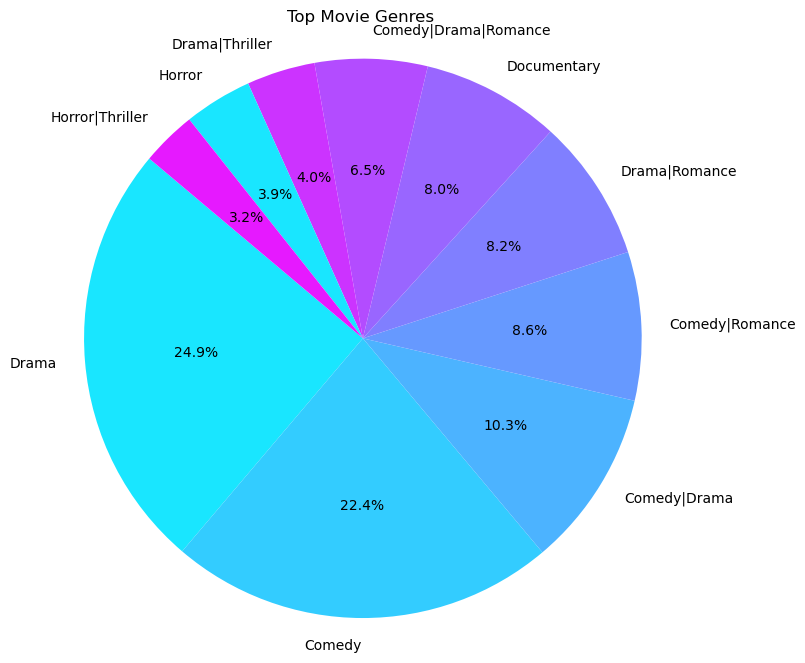

In [9]:
import seaborn as sns
a = plt.cm.cool

top_genres = movies['genres'].explode().value_counts().head(10)
colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.1), a(0.9), a(0.99),]

plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Movie Genres')
plt.axis('equal')
plt.show()


In [10]:
ratings.shape

(100836, 4)

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
movies.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
ratings_with_name = ratings.merge(movies,on='movieId')

In [17]:
ratings_with_name.shape

(100836, 6)

In [18]:
ratings_with_name.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [19]:
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [20]:
ratings_with_name['rating'] = pd.to_numeric(ratings_with_name['rating'], errors='coerce')

In [21]:
avg_rating_df = ratings_with_name.groupby('title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'},inplace=True)
avg_rating_df

,title,avg_ratings
0,'71 (2014),4.000000
1,'Hellboy': The Seeds of Creation (2004),4.000000
2,'Round Midnight (1986),3.500000
3,'Salem's Lot (2004),5.000000
4,'Til There Was You (1997),4.000000
...,...,...
9714,eXistenZ (1999),3.863636
9715,xXx (2002),2.770833
9716,xXx: State of the Union (2005),2.000000
9717,¡Three Amigos! (1986),3.134615


In [22]:
popular_df = num_rating_df.merge(avg_rating_df, on='title')
popular_df

,title,num_ratings,avg_ratings
0,'71 (2014),1,4.000000
1,'Hellboy': The Seeds of Creation (2004),1,4.000000
2,'Round Midnight (1986),2,3.500000
3,'Salem's Lot (2004),1,5.000000
4,'Til There Was You (1997),2,4.000000
...,...,...,...
9714,eXistenZ (1999),22,3.863636
9715,xXx (2002),24,2.770833
9716,xXx: State of the Union (2005),5,2.000000
9717,¡Three Amigos! (1986),26,3.134615


In [23]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)

In [24]:
popular_df.merge(movies,on='title').drop_duplicates('title').shape

(6, 5)

In [25]:
popular_df

,title,num_ratings,avg_ratings
8509,The Shawshank Redemption (1994),317,4.429022
6812,Star Wars: Episode IV - A New Hope (1977),251,4.231076
5838,Pulp Fiction (1994),307,4.197068
8149,The Matrix (1999),278,4.192446
2723,Forrest Gump (1994),329,4.164134
8522,The Silence of the Lambs (1991),279,4.161290


<function matplotlib.pyplot.show(close=None, block=None)>

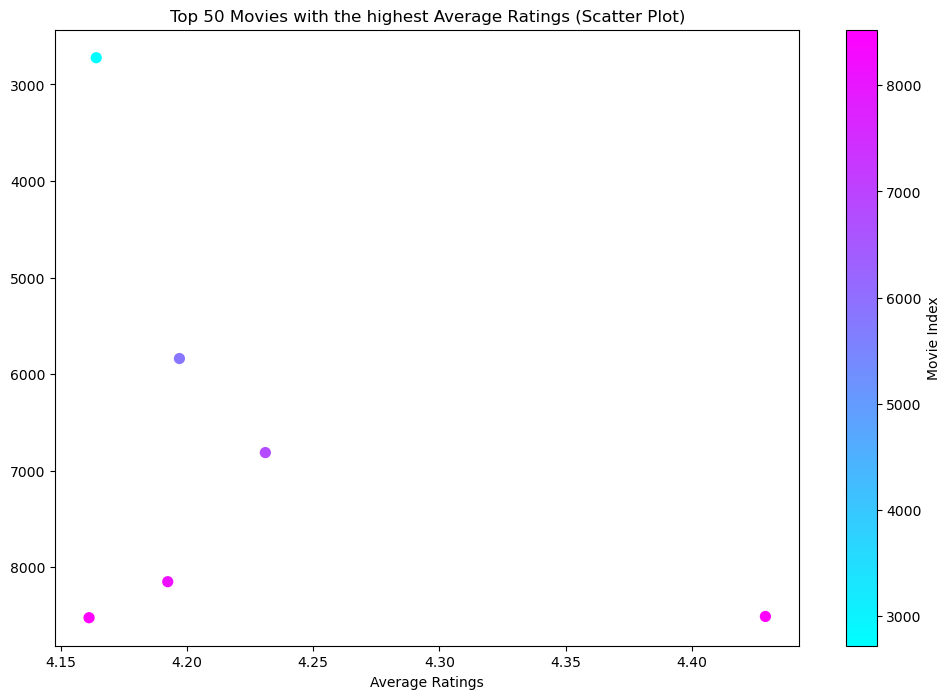

In [26]:
top_50_movies = popular_df.head(50)
plt.figure(figsize=(12,8))
scatter = plt.scatter(top_50_movies['avg_ratings'], top_50_movies.index, c=top_50_movies.index, cmap='cool', s=50)
plt.xlabel('Average Ratings')
plt.title('Top 50 Movies with the highest Average Ratings (Scatter Plot)')
plt.gca().invert_yaxis() 
plt.colorbar(label='Movie Index', orientation='vertical')
plt.show
